In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)
Only 2 mutually exclusive outcomes.

In [2]:
# One Bernoulli trial (aka coin toss).
def trial(p):
    return np.random.choice([0, 1], p=[1 - p, p])

p = 0.5 # Probability of "success".
trial(p)

1

In [3]:
# Many Bernoulli trials == one sample from a binomial distribution.
def binomial(p, n):
    return sum([trial(p) for i in range(n)]) # Number of "successes".

n = 10 # Number of trials.
binomial(p, n)

6

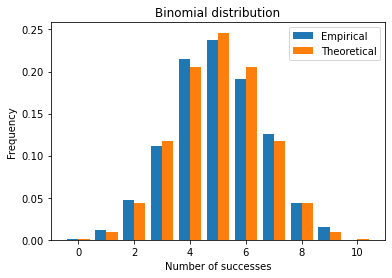

In [4]:
p = 0.5  # Probability of "success".
n = 10   # Number of trials.
s = 1000 # Sample size.

# Custom binomial distribution.
binom_sample = [binomial(p, n) for i in range(s)]
binom_dist = pd.Series(binom_sample).value_counts() / s

# SciPy binomial distribution.
binom_dist_scipy = stats.binom.pmf(range(n + 1), n, p)

width = 0.4
plt.bar(binom_dist.index - width / 2, binom_dist, width=width)
plt.bar(np.arange(n + 1) + width / 2, binom_dist_scipy, width=width)
plt.xlim([-1, n + 1])

plt.title('Binomial distribution')
plt.xlabel('Number of successes')
plt.ylabel('Frequency')
plt.legend(['Empirical', 'Theoretical'])

plt.show()

# Uniform sampling

In [5]:
import random

population = ['Alice', 'Bob', 'Carol', 'Dave', 'Erin', 'Frank']
k = 3

# Without replacement.
print(random.sample(population, k=k))

# With replacement.
print(random.choices(population, k=k))
# Equivalent to:
# print([random.sample(population, k=1)[0] for i in range(k)])

# In pandas.
print(pd.Series(population).sample(n=k, replace=False)) # "weights" argument controls non-uniform sampling.

['Carol', 'Frank', 'Bob']
['Dave', 'Dave', 'Erin']
2    Carol
3     Dave
4     Erin
dtype: object


# Stratified sampling
`sklearn.model_selection.StratifiedShuffleSplit` creates stratified train and test sets for cross-validation.

In general:

In [6]:
# Stratification variable.
age = ['young', 'young', 'old', 'old', 'old', 'old']

for p, a in zip(population, age):
    print(p, a)

Alice young
Bob young
Carol old
Dave old
Erin old
Frank old


In [7]:
s = pd.Series(population) \
    .groupby(age) \
    .apply(lambda x: random.sample(list(x), k=1))

print(s['young'])
print(s['old'])

['Alice']
['Erin']


# Random variables and distributions
Random does not mean uniform.

## Categorical variable (probability mass function)
A qualitative variable that can take one of several possible values (e.g. customer choosing one product over the other).

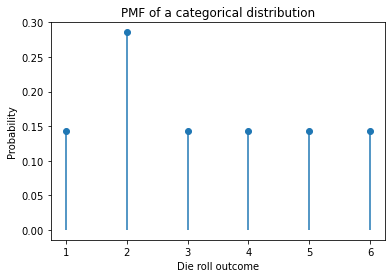

In [8]:
x = np.arange(6) + 1

p = np.array((1, 2, 1, 1, 1, 1)) # Must sum 1.
p = p / sum(p)
loaded = stats.rv_discrete(name='loaded_die', values=(x, p))

plt.plot(x, loaded.pmf(x), marker='o', linestyle='')
plt.vlines(x, 0, loaded.pmf(x), color='C0')

plt.title('PMF of a categorical distribution')
plt.xlabel('Die roll outcome')
plt.ylabel('Probability')

plt.show()

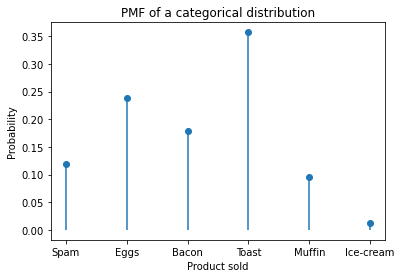

In [9]:
x = np.arange(6) + 1

p = np.array((10, 20, 15, 30, 8, 1)) # Must sum 1.
p = p / sum(p)
sales = stats.rv_discrete(name='sales', values=(x, p))

plt.plot(x, sales.pmf(x), marker='o', linestyle='')
plt.vlines(x, 0, sales.pmf(x), color='C0')

plt.title('PMF of a categorical distribution')
plt.xlabel('Product sold')
plt.ylabel('Probability')
plt.xticks(ticks=x, labels=['Spam', 'Eggs', 'Bacon', 'Toast', 'Muffin', 'Ice-cream'])

plt.show()

## Discrete variable (probability mass function)
A quantitative variable that can only take integer values (e.g. number of items sold).

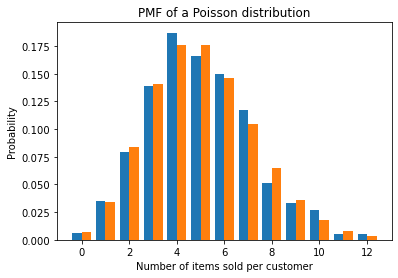

In [10]:
s = 1000
mu = 5

n_sold = stats.poisson.rvs(mu, size=s) # Random variates.
n_sold_dist = pd.Series(n_sold).value_counts() # Empirical Poisson distribution.
n_sold_dist = n_sold_dist / sum(n_sold_dist) # Needs to sum 1.
poisson_dist_scipy = stats.poisson.pmf(n_sold_dist.index, mu) # Theoretical Poisson distribution.

width = 0.4
plt.bar(n_sold_dist.index - width / 2, n_sold_dist, width=width)
plt.bar(n_sold_dist.index + width / 2, poisson_dist_scipy, width=width)

plt.title('PMF of a Poisson distribution')
plt.xlabel('Number of items sold per customer')
plt.ylabel('Probability')

plt.show()

## Continuous variable (probability density function)
A quantitative variable that can take real values (e.g. income from sales).

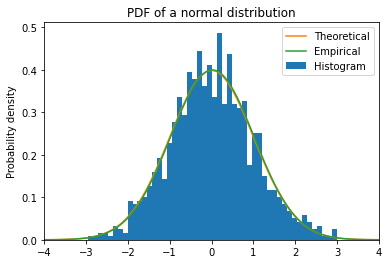

In [11]:
class rv_normal(stats.rv_continuous):
    def _pdf(self ,x):
        return np.exp(-x**2 / 2.0) / np.sqrt(2.0 * np.pi)
    
normal = rv_normal(name='normal')

s = 1000
mu = 0
sigma = 1
x = sorted(stats.norm.rvs(size=s, loc=mu, scale=sigma)) # Sorted for the plot.
x_ = np.linspace(-4, 4, 100)

n, bins, patches = plt.hist(x, density=True, bins=50) # Histogram.
plt.plot(x_, normal.pdf(x_, loc=mu, scale=sigma)) # Theoretical distribution.
plt.plot(x_, normal.pdf(x_, loc=np.mean(x), scale=np.std(x))) # Empirical distribution.
plt.xlim((min(x_), max(x_)))

plt.title('PDF of a normal distribution')
plt.legend(['Theoretical', 'Empirical', 'Histogram'])
plt.ylabel('Probability density')

plt.show()

# Cumulative distribution function
Just the cumulative sum of the probability mass/density function.

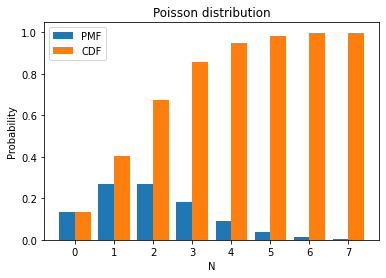

In [12]:
# Discrete example (Poisson).
mu = 2
x = 8

poisson_dist_scipy = stats.poisson.pmf(range(x), mu) # Theoretical Poisson distribution.

width = 0.4
plt.bar(np.arange(x) - width / 2, poisson_dist_scipy, width=width)
plt.bar(np.arange(x) + width / 2, np.cumsum(poisson_dist_scipy), width=width)
#plt.bar(np.arange(x) + width / 2, stats.poisson.cdf(np.arange(x), mu), width=width)

plt.title('Poisson distribution')
plt.xlabel('N')
plt.ylabel('Probability')
plt.legend(['PMF', 'CDF'])

plt.show()

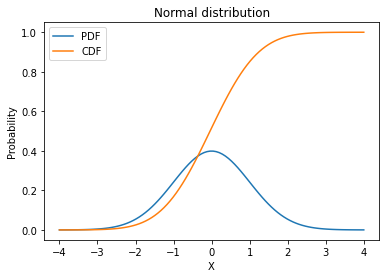

In [13]:
# Continuous example (normal).
mu = 0
sigma = 1
x = np.linspace(-4, 4, 100)

normal_dist_scipy = stats.norm.pdf(x, mu, sigma) # Theoretical normal distribution.

plt.plot(x, normal_dist_scipy)
plt.plot(x, np.cumsum(normal_dist_scipy) / np.sum(normal_dist_scipy))
#plt.plot(x, stats.norm.cdf(x, mu, sigma))

plt.title('Normal distribution')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend(['PDF', 'CDF'])

plt.show()